In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\swink_000\Anaconda2\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Peer-graded Assignment: Описательный анализ данных

Часто при работе с пользовательскими данными приходится сталкиваться с тем, что данные предоставляются для работы без описания. При этом не известно, что содержательно представляют собой те или иные признаки, а известны лишь их типы: числовые, категориальные, номинальные переменные. Такие ситуации - не редкость при работе с «чувствительными» данными, например, в сфере банковской аналитики, HR-аналитики, сфере телекоммуникаций, страхования, здравоохранения, недвижимости или ритейла. Тем не менее, с такими данным нужно уметь работать, и нужно уметь проводить на них классические этапы анализа, в частности описательный анализ данных и визуализацию. Именно этим мы займемся на первой неделе.


В этом задании мы потренируемся делать описательный анализ и визуализацию так называемых «закрытых» данных - данных, которые предоставляются для анализа и построения моделей без описания. Выборка, с которой мы будем работать прилагается.

* Метки классов (здесь `1` соответствует классу `отток`, `-1` - классу `не отток`) – `orange_small_churn_labels.train`
* Данные (предоставлены без описания, однако известно, что первые 190 переменных являются числовыми, а оставшиеся 40 - категориальными) – `orange_small_churn_data.train`

Скачайте эти файлы [на странице задания](https://www.coursera.org/learn/data-analysis-project/peer/roSOe/opisatiel-nyi-analiz-dannykh) и переходите к выполнению задачи! Результатом выполнения задания является jupyter notebook. Перед отправкой результата убедитесь, что вы выполнили все пункты из задания и это можно понять из вашего notebook'а. Проверьте, что код написан понятно и аккуратно - это поможет вашим сокурсником лучше понять, что вы сделали, и оценить вашу работу.

## Инструкции

1\. Загрузите данные `orange_small_churn_data.train` и `orange_small_churn_labels.train`

In [2]:
train = pd.read_csv('orange_small_churn_data.txt')
labels = pd.read_csv('orange_small_churn_labels.txt', header = None)
train['label'] = labels

2\. Рассчитайте доли классов `отток` и `не отток`.

In [9]:
print u'Доля не оттока {0}'.format(train['label'].value_counts().values[0]/float(len(train['label'])))
print u'Доля оттока {0}'.format(1 - train['label'].value_counts().values[0]/float(len(train['label'])))

Доля не оттока 0.92640625
Доля оттока 0.07359375


3\. Рассчитайте корреляции переменных с целевой функцией и проанализируйте полученные данные.

Обратите внимание на то, что целевая функция предсталвляет собой бинарную переменную. Теоретически, это не помешает рассчиать, например, корреляцию Пирсона между непрерывной переменной и целевой функцией, онднако анализиоовать полученные результаты будет сложно, корреляция Пирсона просто не рассчитана на такое применение. Кто уже забыл, как действовать в такой ситуации - вспоминить можно вот здесь: https://www.coursera.org/teach/stats-for-data-analysis/content/edit/lecture/prX3S/video-subtitles 

In [8]:
#для числовых
df_float = train.select_dtypes(include=[np.float])
df_float['label'] = labels
float_corr_array = []
df_float.fillna(0, inplace = True)
for col in df_float.columns[:-1]:
    correlation = df_float[col].loc[df_float['label'] == 1].mean() - df_float[col].loc[df_float['label'] == -1].mean()
    float_corr_array.append(correlation)
    
arr = np.reshape([df_float.columns[:-1],float_corr_array], (2,len(float_corr_array))).T
corrTable = pd.DataFrame(arr, columns = ['feature_name', 'corr'])
list(corrTable.sort_values(by = ['corr'], ascending = False)['feature_name'][:20])

C:\Users\swink_000\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


['Var153',
 'Var38',
 'Var113',
 'Var76',
 'Var131',
 'Var133',
 'Var134',
 'Var163',
 'Var149',
 'Var81',
 'Var53',
 'Var98',
 'Var111',
 'Var28',
 'Var126',
 'Var123',
 'Var83',
 'Var132',
 'Var50',
 'Var35']

In [ ]:
#для категориальных
import scipy.stats as ss

def cramers_corrected_stat(confusion_matrix):
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = np.maximum(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / np.minimum( (kcorr-1), (rcorr-1)))

df_object = train.select_dtypes(include=[np.object])
df_object['label'] = labels
object_corr_array = []
for col in df_object.columns[:-1]:
    confusion_matrix = pd.crosstab(df_object[col], df_object['label'])
    correlation = cramers_corrected_stat(confusion_matrix).values[1]
    object_corr_array.append(correlation)
    
arr = np.reshape([df_object.columns[:-1],object_corr_array], (2,len(object_corr_array))).T
corrTable = pd.DataFrame(arr, columns = ['feature_name', 'corr'])
list(corrTable.sort_values(by = ['corr'], ascending = False)['feature_name'][:20])

C:\Users\swink_000\Anaconda2\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\swink_000\Anaconda2\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in sqrt
  if sys.path[0] == '':


4\. Визуализируйте данные: рассмотрите топ 20 числовых переменных, наиболее сильно коррелирующих с целевой функцией. Для этих переменных постройте:
* Распределения в разрезе классов
* Отобразите объекты в координатах пар признаков

In [49]:
top20corrCols = list(corrTable.reindex(corrTable['corr'].abs().sort_values(ascending = False).index)['feature_name'].values[:20])

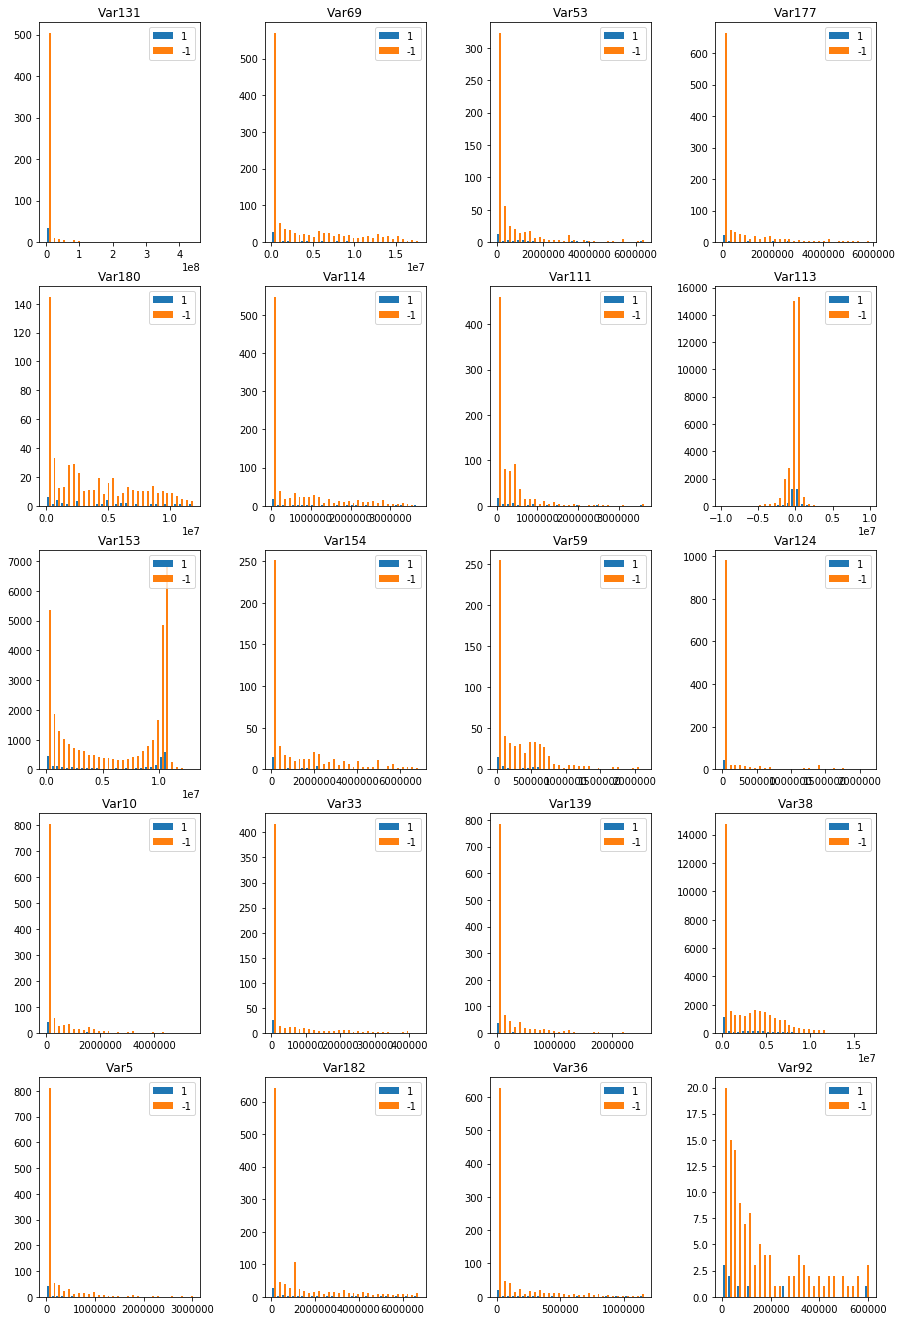

In [50]:
fig, axs = plt.subplots(5,4, figsize=(15, 12), facecolor='w', edgecolor='k')
fig.subplots_adjust(top = 1.6, wspace=.4)
axs = axs.ravel()
for i in range(20):
    
    axs[i].hist([train[top20corrCols[i]].loc[train['label'] == 1].dropna(),
                 train[top20corrCols[i]].loc[train['label'] == -1]], bins=30, label = [1, -1])
    axs[i].set_title(top20corrCols[i])
    axs[i].legend(loc='upper right')


plt.show()

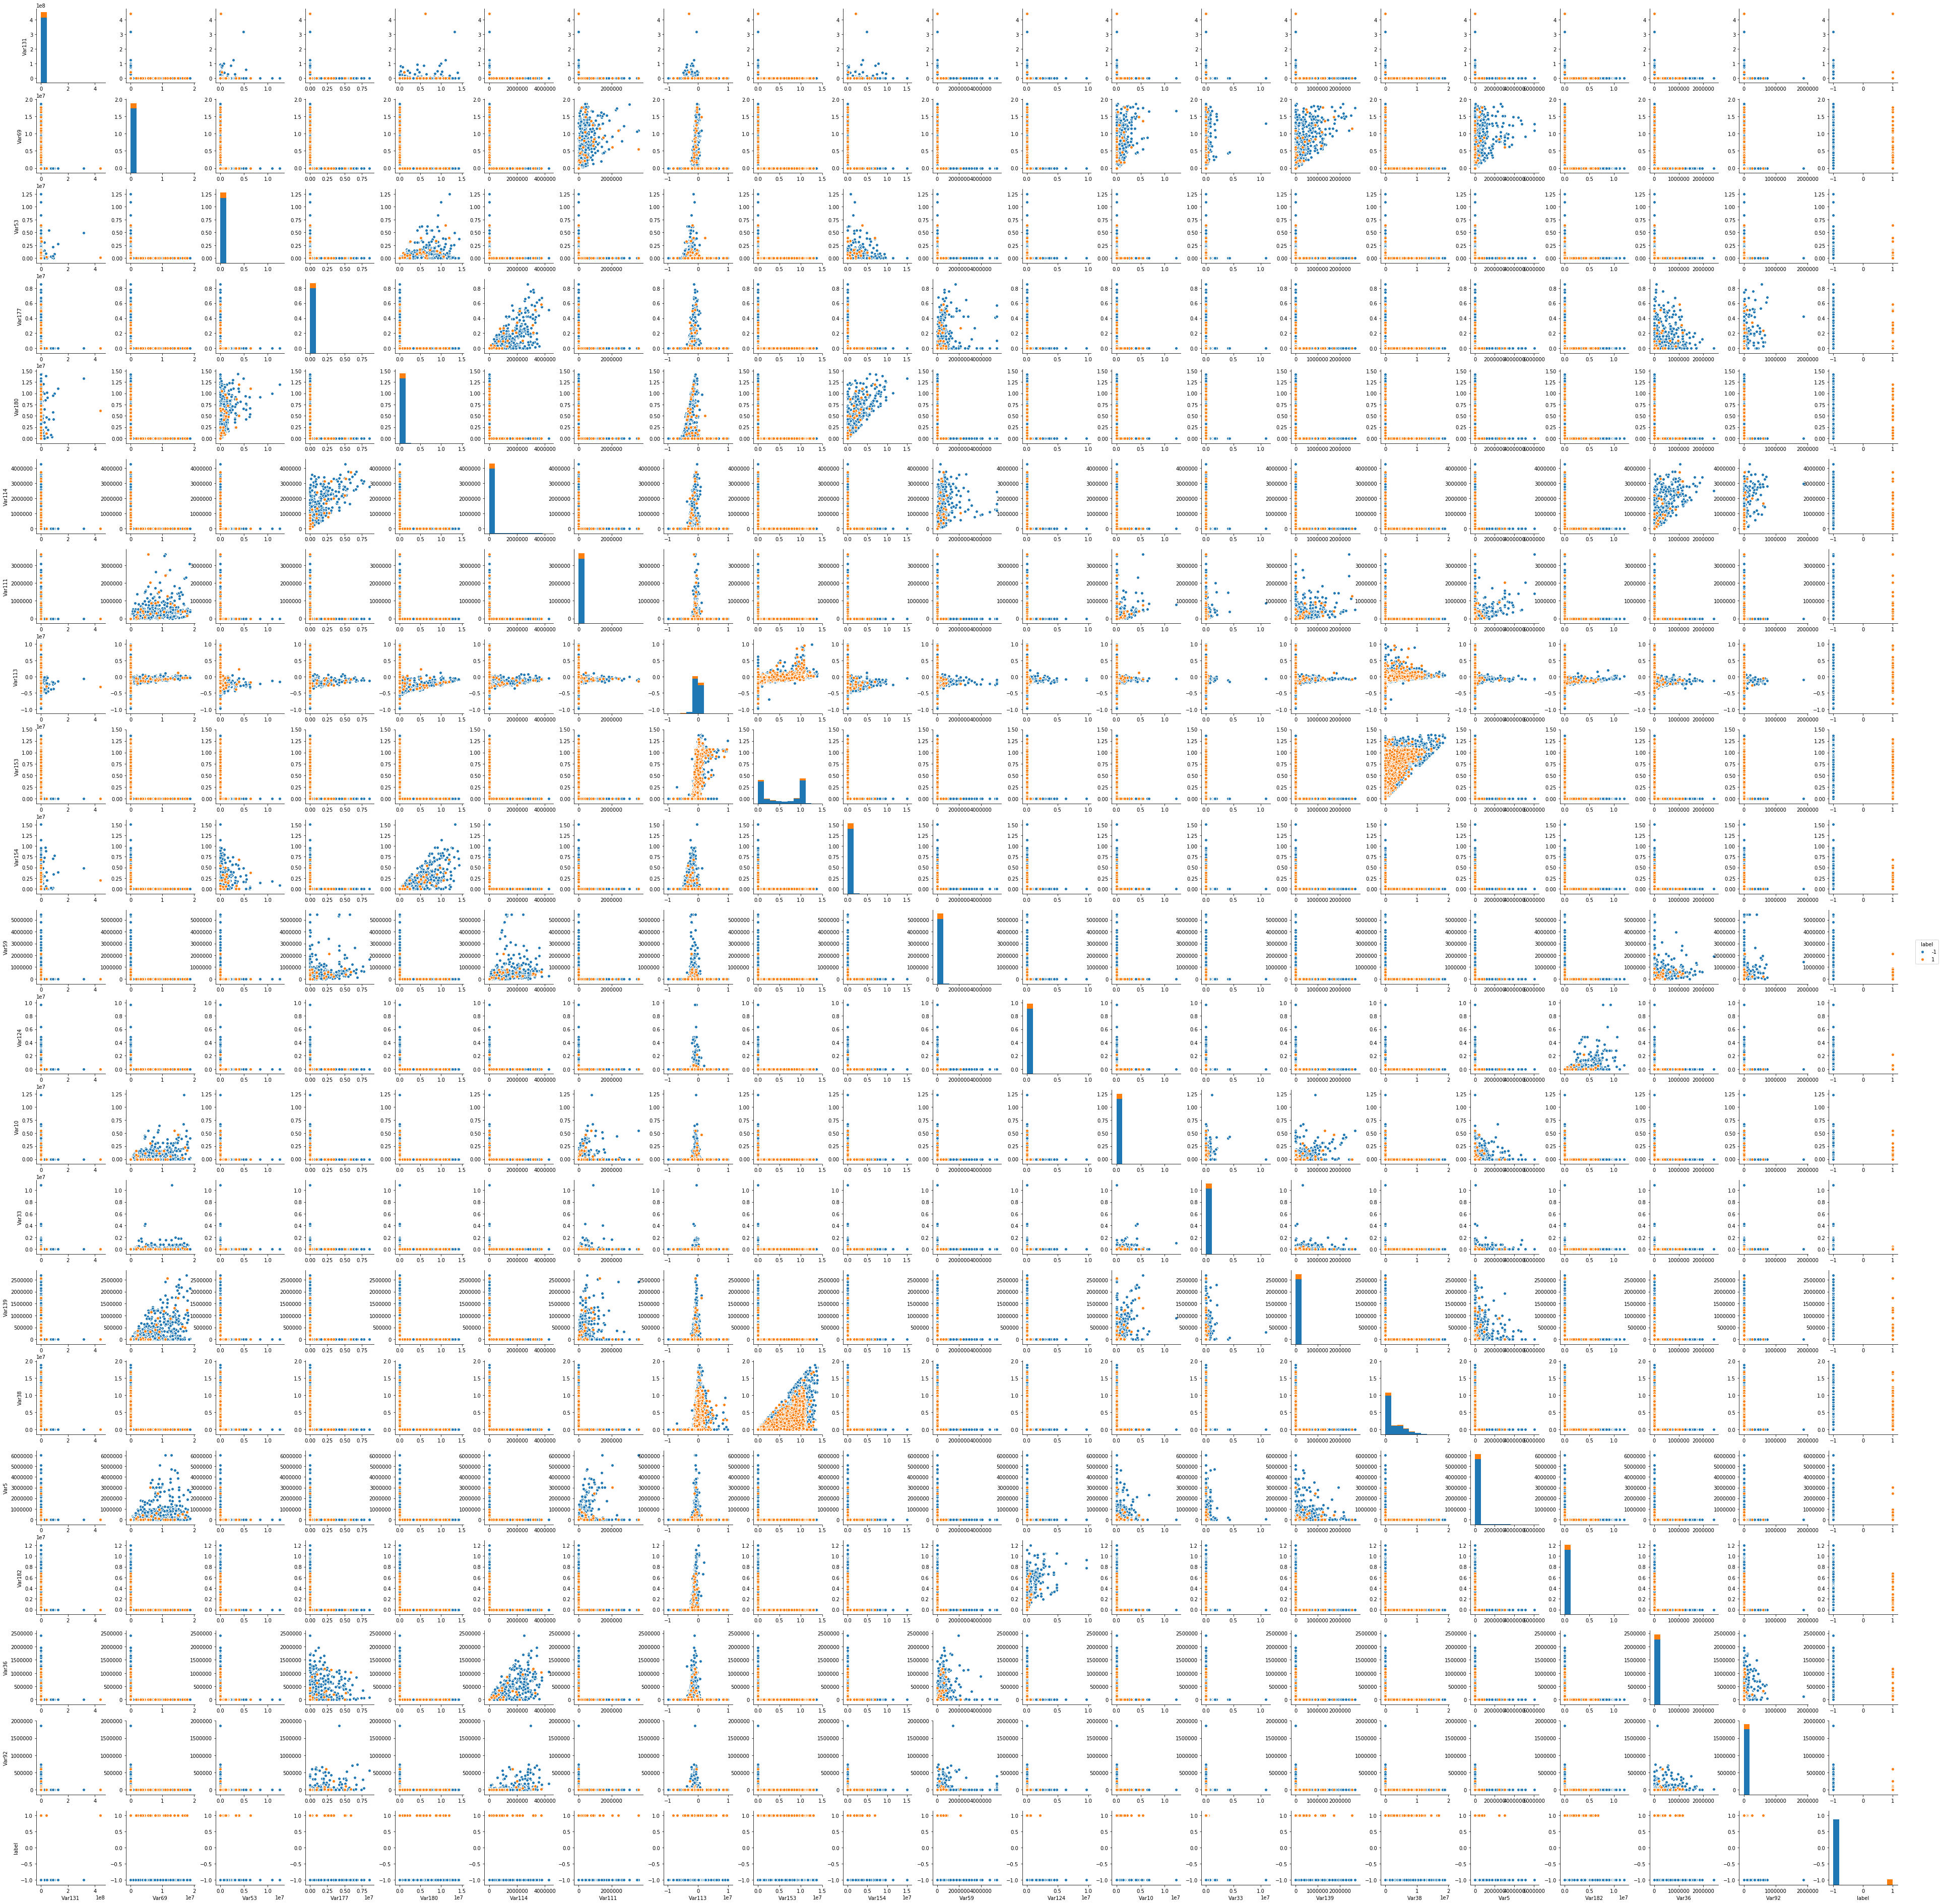

In [51]:
sns.pairplot(train[top20corrCols + ['label']].fillna(0), hue = 'label')

5\. Проделайте аналогичные шаги для случайно выбранных 10 числовых признаков.

In [6]:
df_floatSample = df_float.sample(10, axis=1)
df_floatSample['label'] = labels

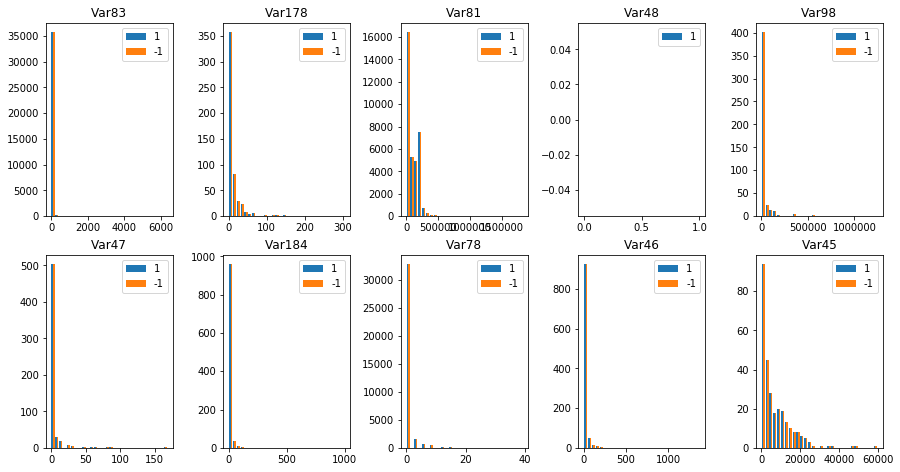

In [26]:
fig, axs = plt.subplots(2,5, figsize=(15, 4), facecolor='w', edgecolor='k')
fig.subplots_adjust(top = 1.6, wspace=.4)
axs = axs.ravel()

for i in range(10):
    axs[i].hist([train[df_floatSample.loc[df_floatSample['label'] == 1].columns[i]].dropna(),
                 train[df_floatSample.loc[df_floatSample['label'] == -1].columns[i]].dropna()]
                                                                    ,bins=30, label = [1, -1])
#     axs[i].hist(train[df_floatSample.loc[df_floatSample['label'] == -1].columns[i]].dropna()
#                                                                     ,bins=30, alpha = 0.5)
    axs[i].set_title(df_floatSample.columns[i])
    axs[i].legend(loc='upper right')


plt.show()

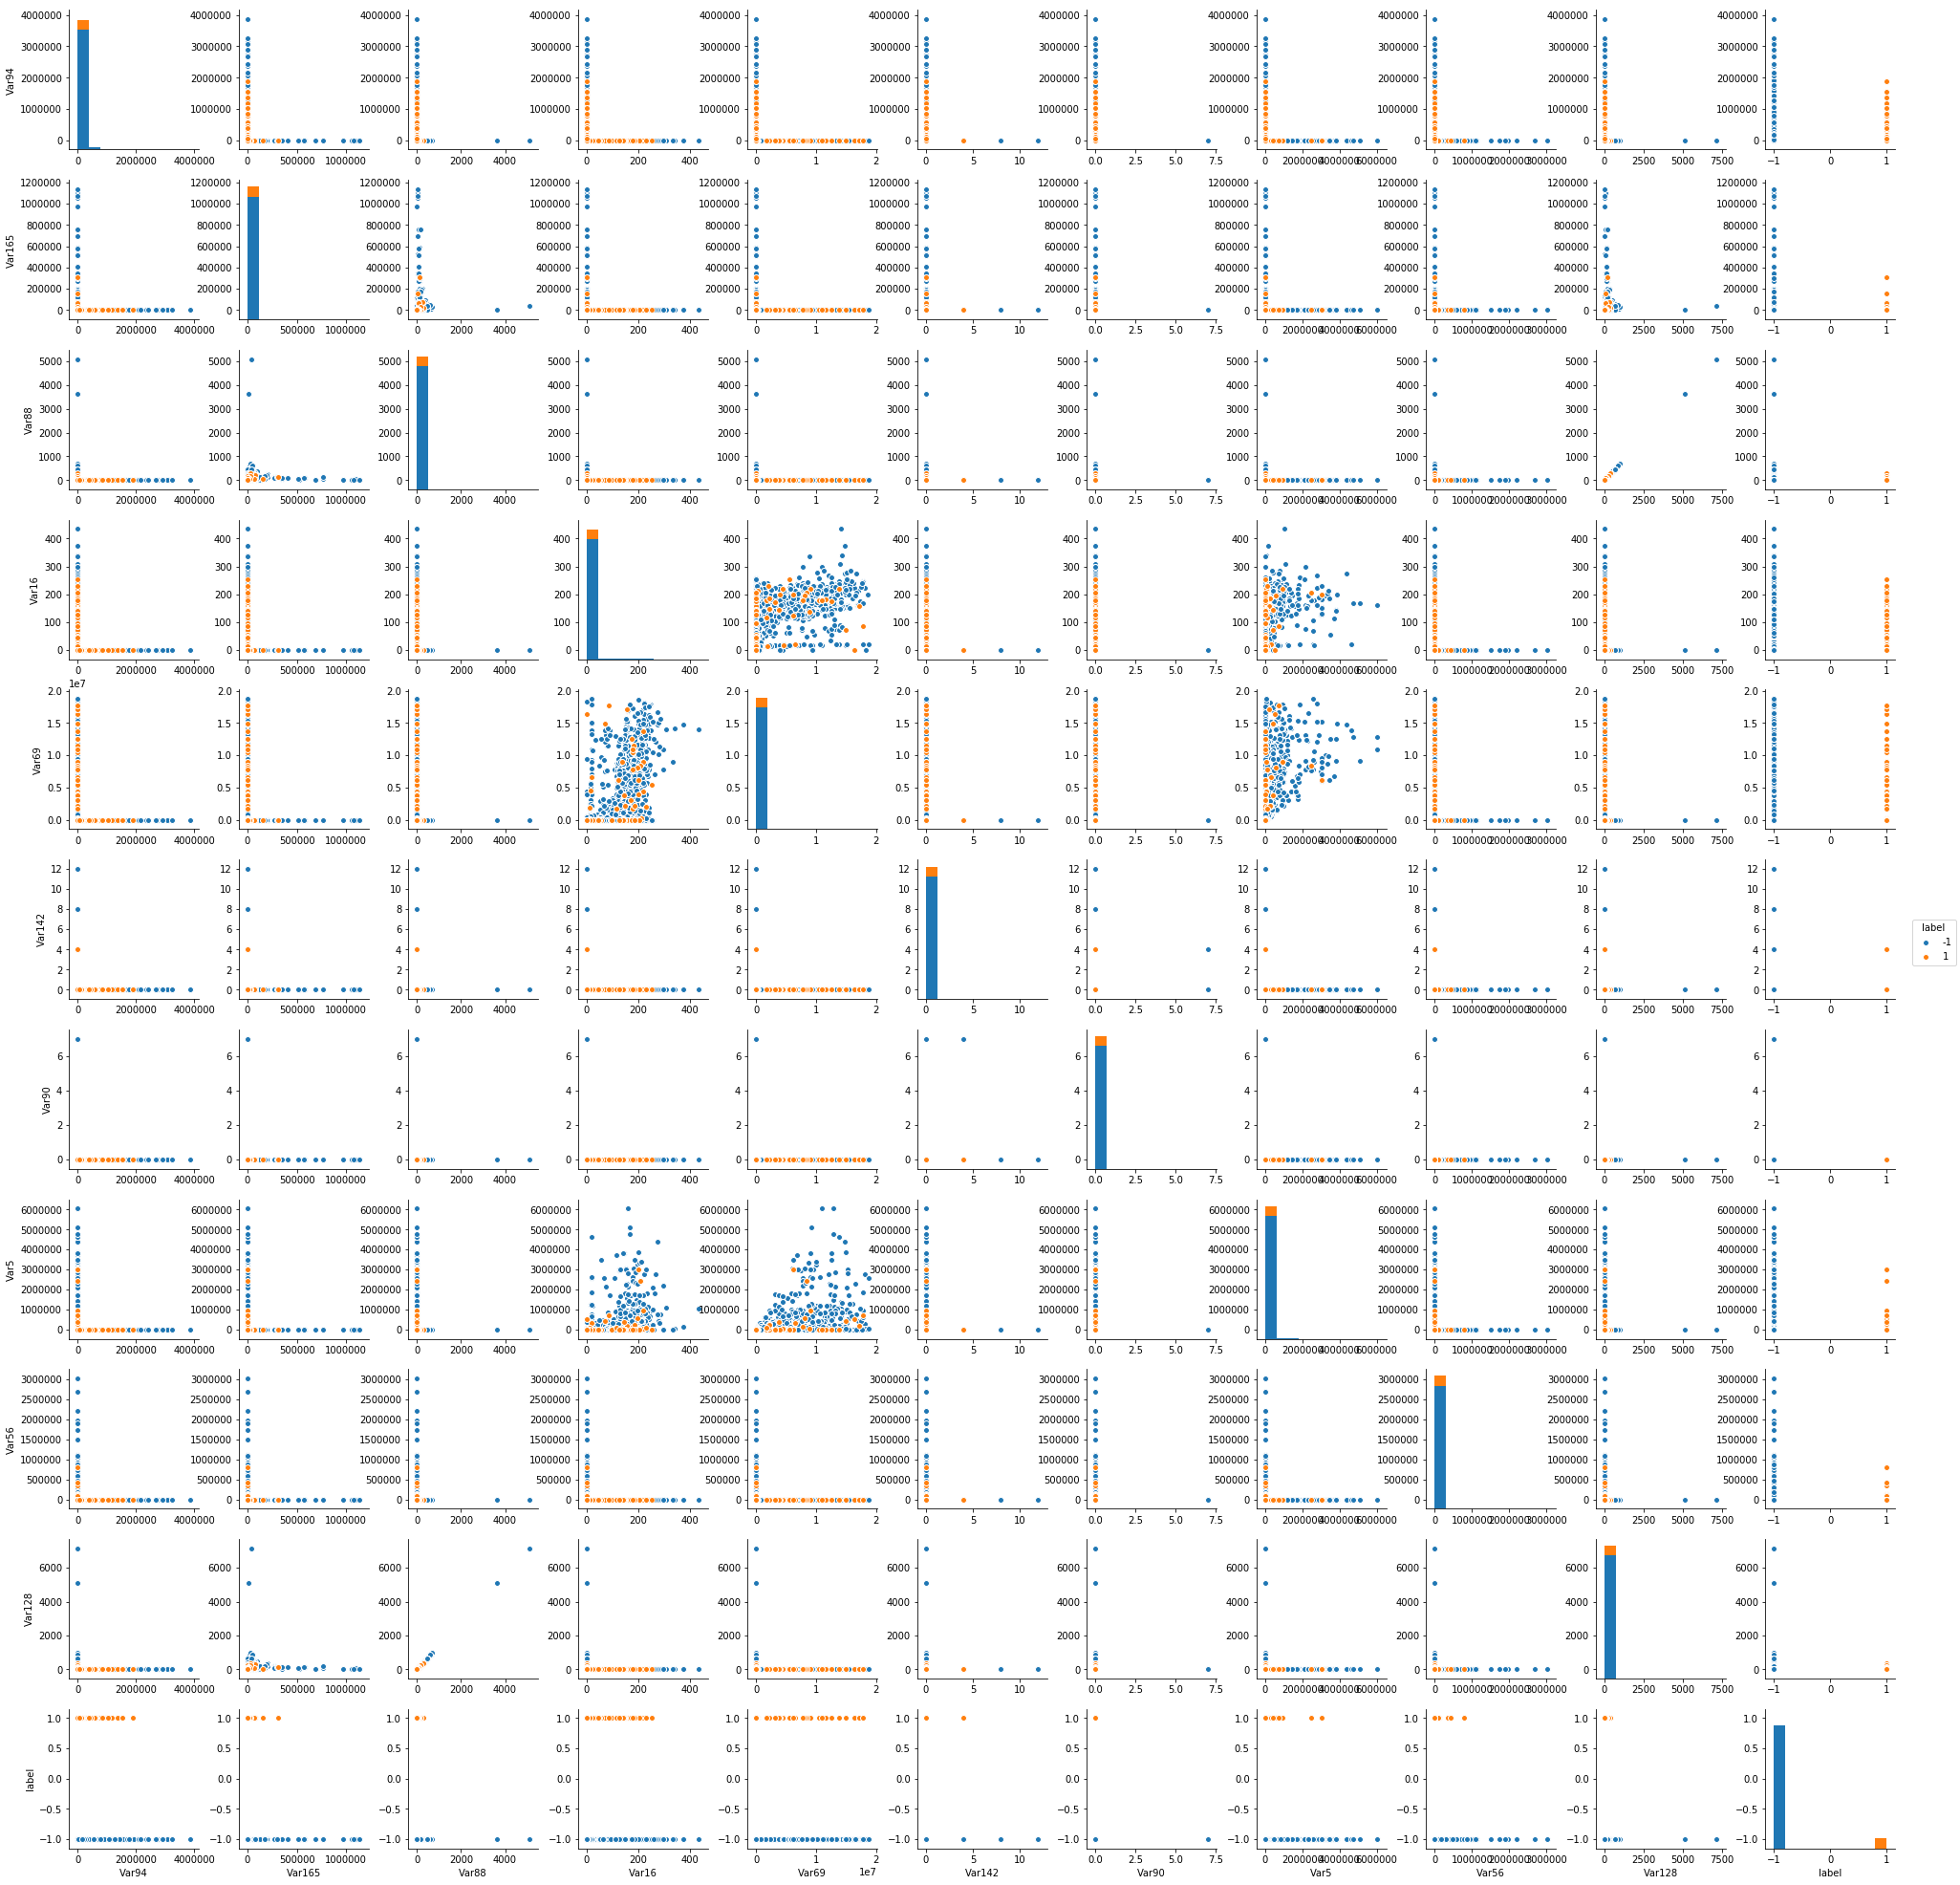

In [100]:
sns.pairplot(df_floatSample.fillna(0), hue = 'label')

6\. Проделайте аналогичные шаги для 10 числовых признаков, наименее сильно коррелирующих с целевой переменной.

In [52]:
#Наименее коррелирующие с целевой переменной - те, у которых разница между мат. ожиданиями минимальна
least20corrCols = list(corrTable.reindex(corrTable['corr'].abs().sort_values(ascending = True).index)['feature_name'].values[:10])

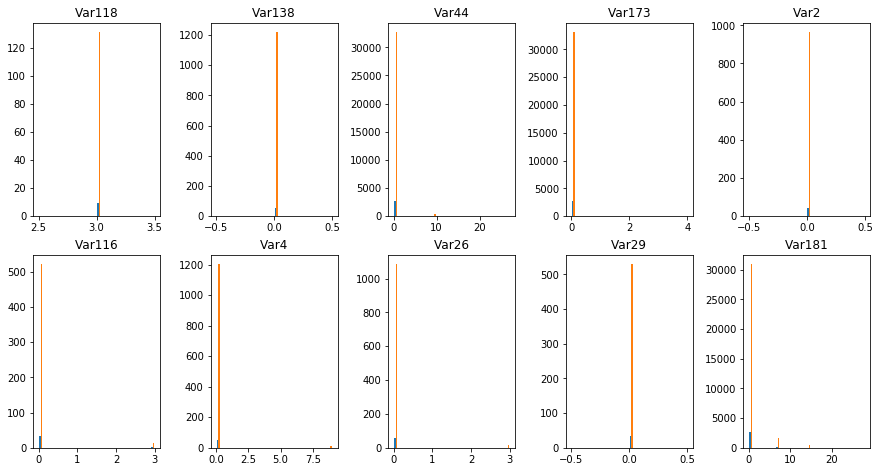

In [53]:
fig, axs = plt.subplots(2,5, figsize=(15, 4), facecolor='w', edgecolor='k')
fig.subplots_adjust(top = 1.6, wspace=.4)
axs = axs.ravel()
for i in range(10):
    axs[i].hist([train[least20corrCols[i]].loc[train['label'] == 1].dropna(),
                 train[least20corrCols[i]].loc[train['label'] == -1]], bins=30, label = [1, -1])
    axs[i].set_title(least20corrCols[i])

plt.show()

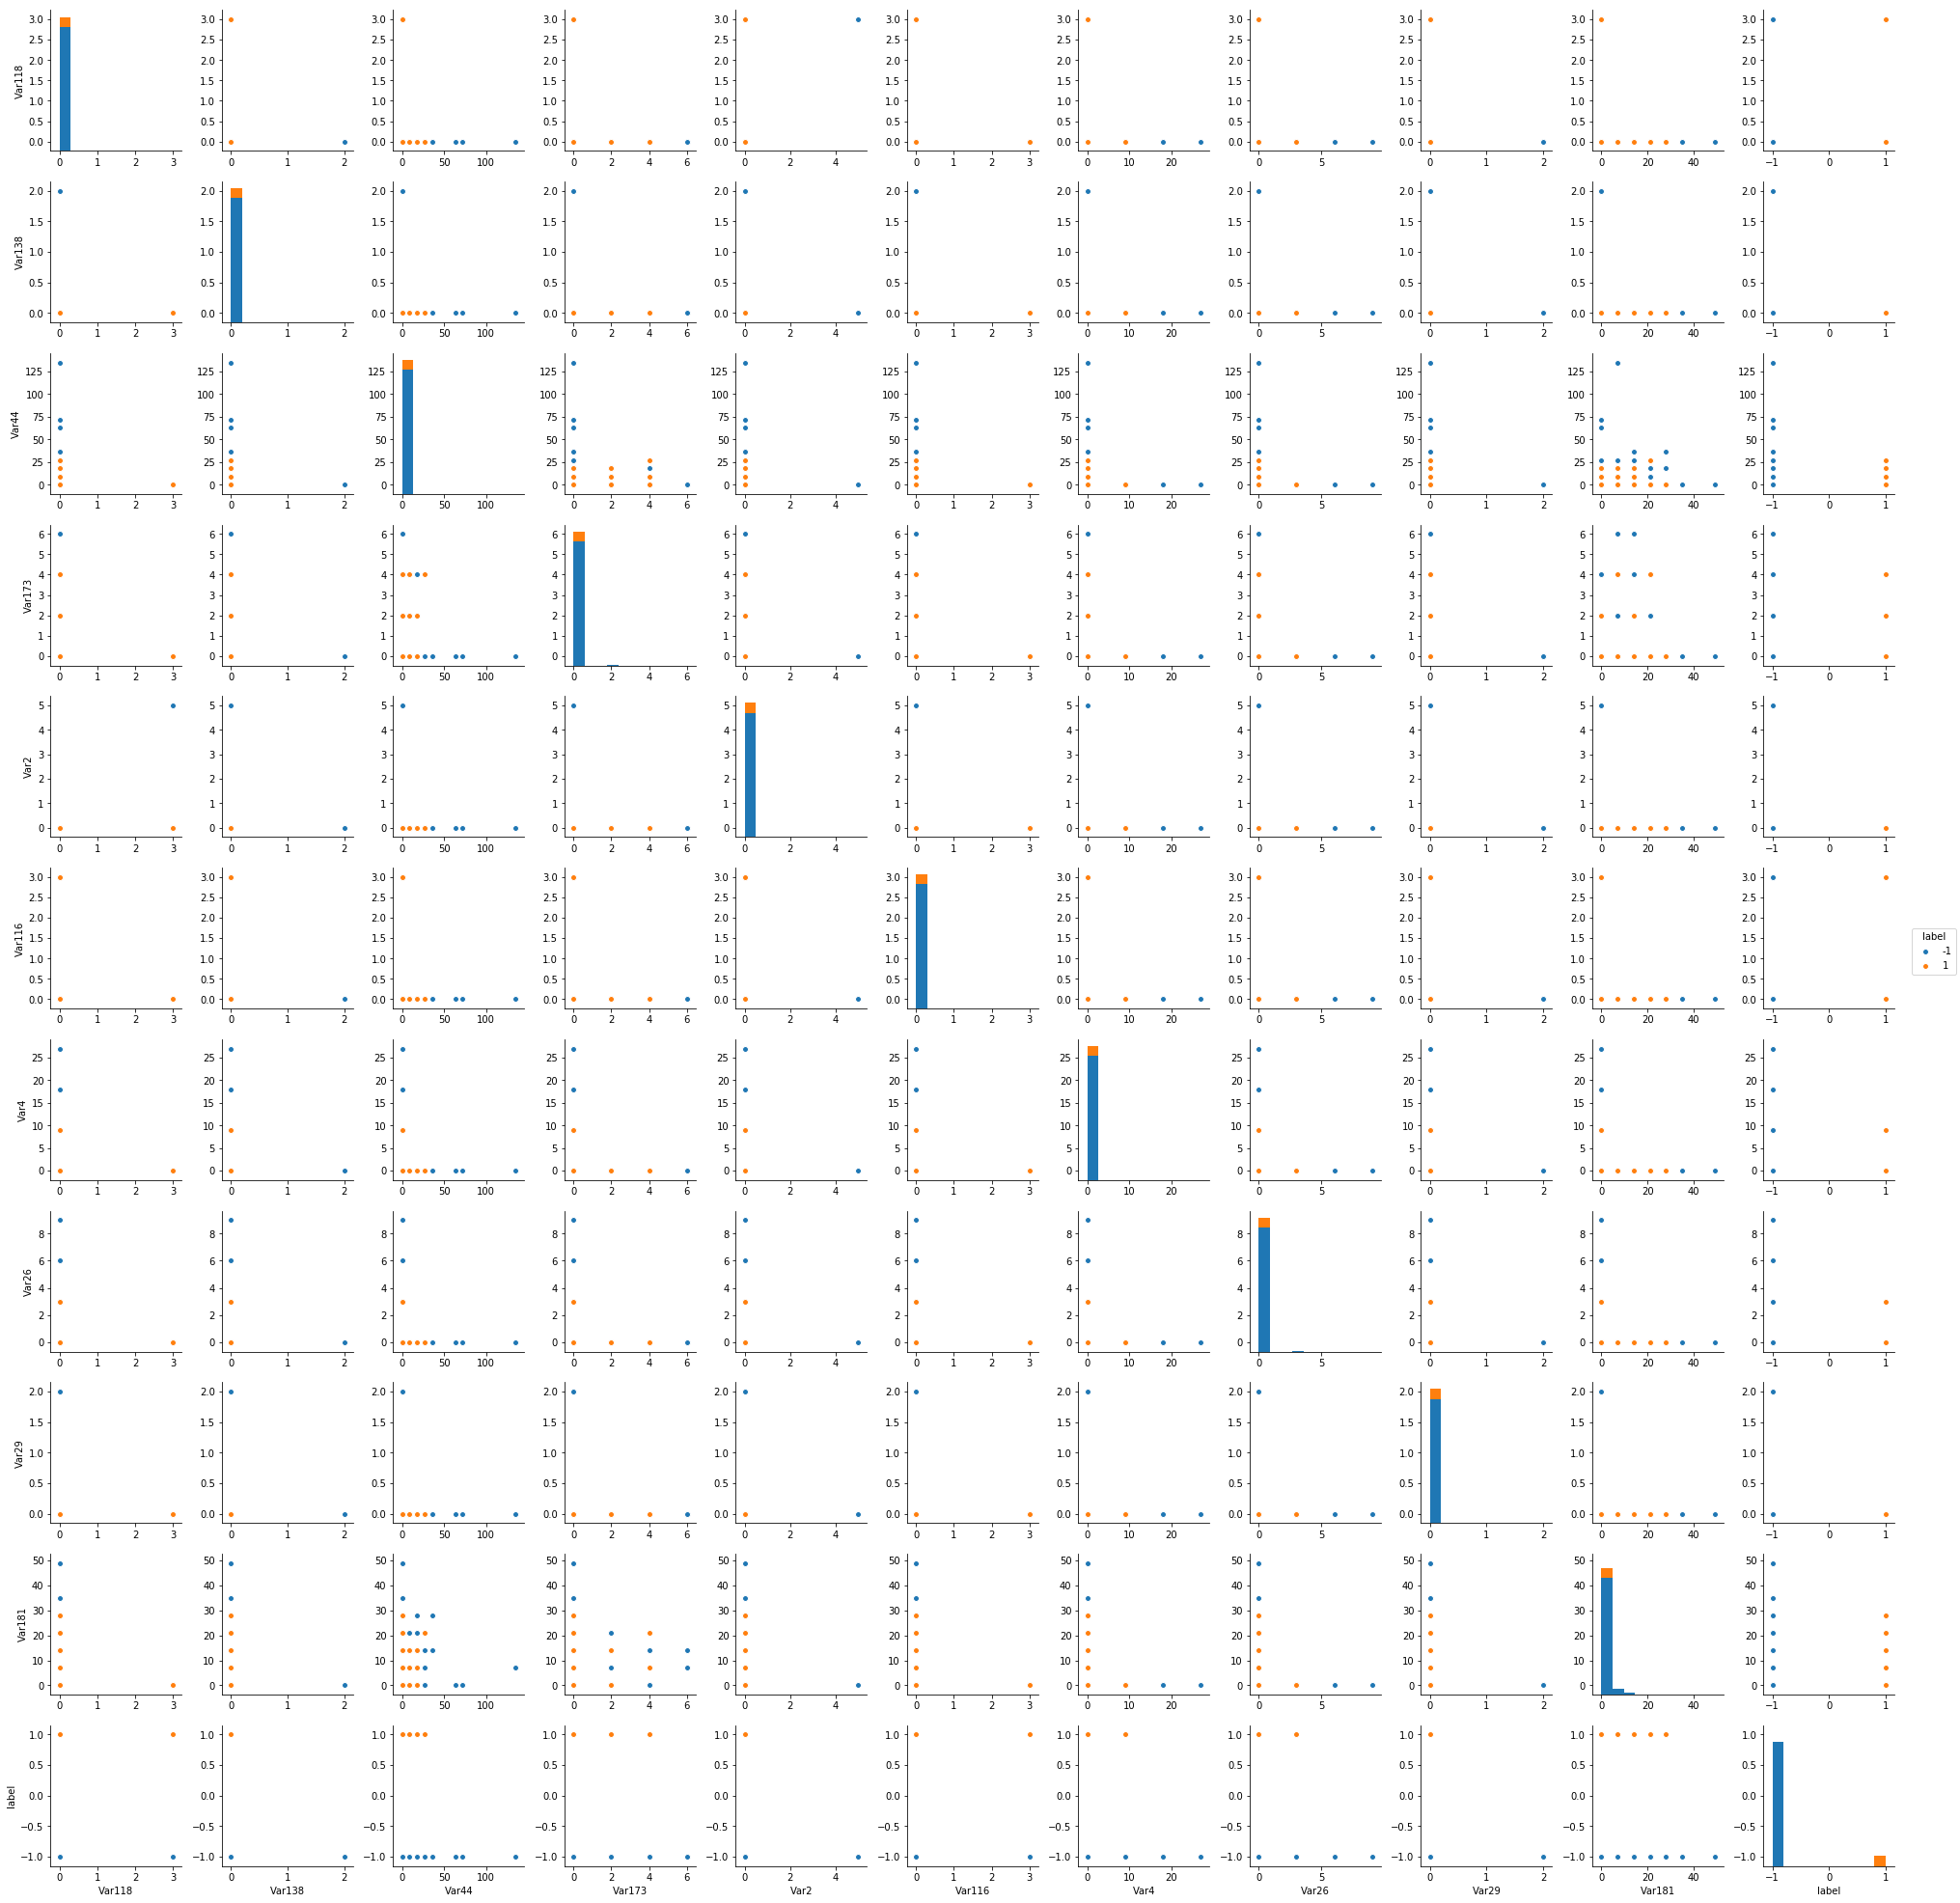

In [54]:
sns.pairplot(train[least20corrCols + ['label']].fillna(0), hue = 'label')

7\. Посмотрите на категориальные переменные: постройте и сравните гистограммы значений категориальных переменных для разных классов.

In [31]:
df_object = train.select_dtypes(include=['object'])
df_object['label'] = labels 

C:\Users\swink_000\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


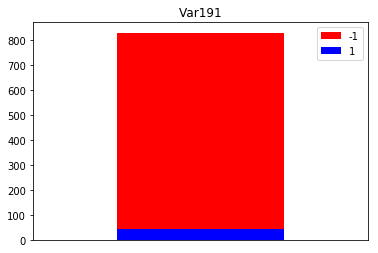

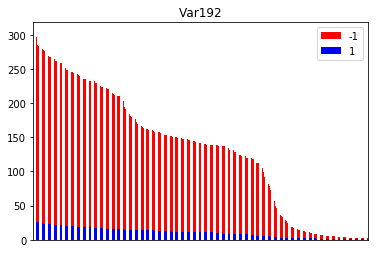

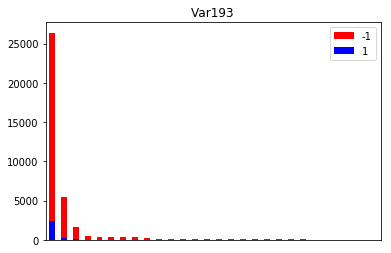

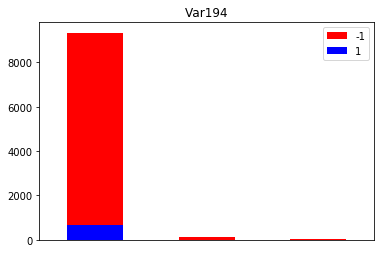

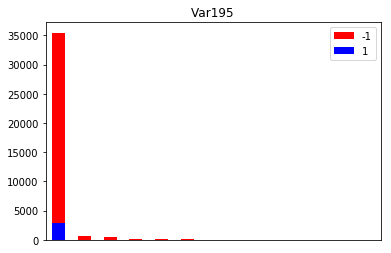

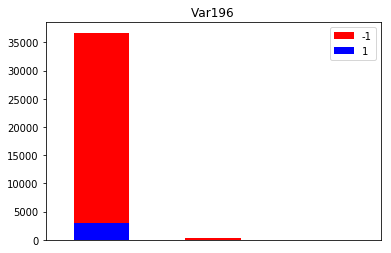

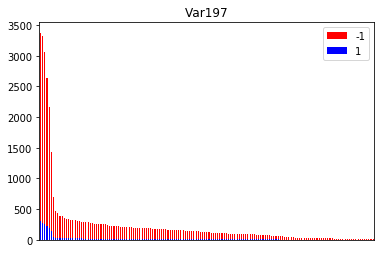

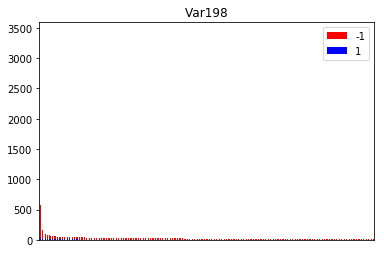

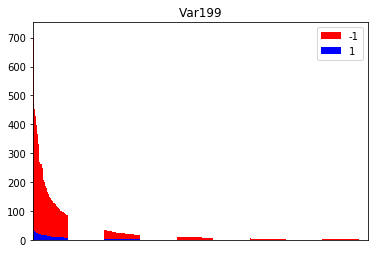

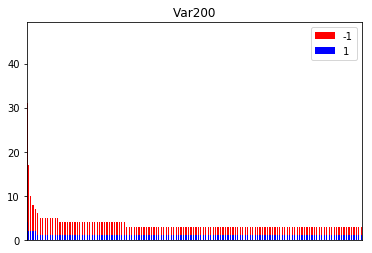

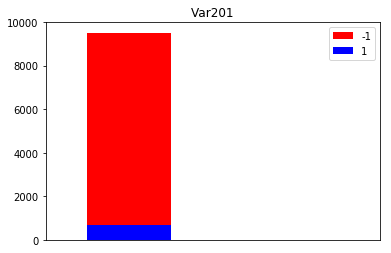

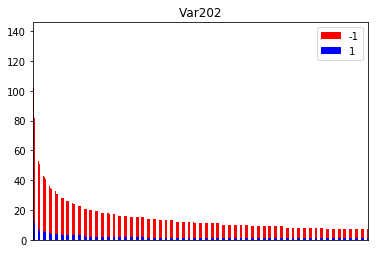

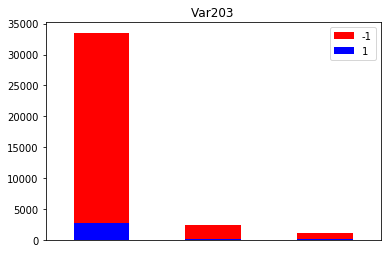

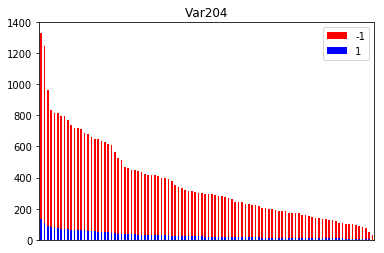

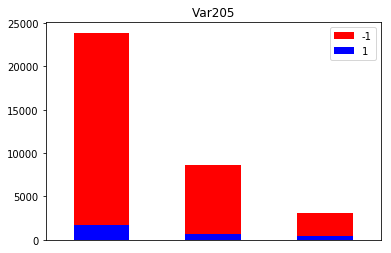

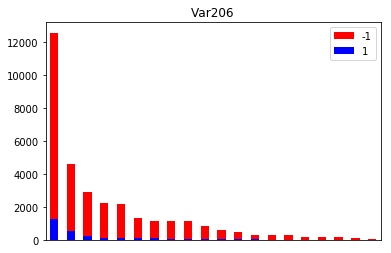

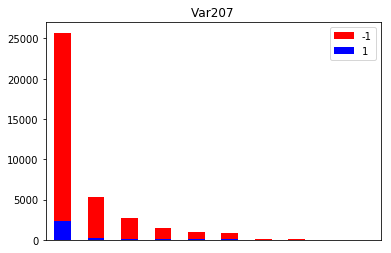

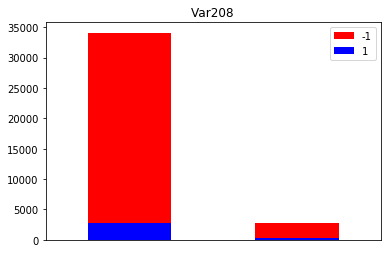

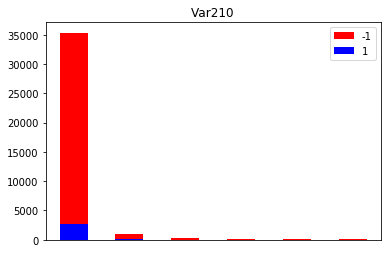

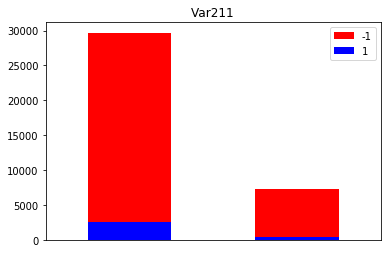

In [14]:
#построим для первых 20 признаков
for col in df_object.columns[:20]:
    plt.figure()
    df_object[col].loc[df_object['label'] == -1].value_counts().plot(kind='bar', color= 'r', use_index = False,label = '-1')
    df_object[col].loc[df_object['label'] == 1].value_counts().plot(kind='bar', color= 'b', use_index = False, label = '1')
    plt.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False) # labels along the bottom edge are off
    plt.legend()
    plt.title(col)

8\. Проанализируйте полученные результаты:
* Какие выводы вы можете сделать? Заметили ли вы какие-нибудь интересные закономерности?
* На основании полученных изображений и таблиц, предположите, какие переменные окажут наибольшее влияние (вклад) в модель?
* Какие переменные на ваш взгляд окажутся наименее полезными, шумовыми?
* Как вы думаете, окажется ли отбор признаков полезным для построения модели?

1) В задании нами были рассмотрены наиболее коррелирующие признаки. Рассмотрим их распределения:

* Среди коррелирующих признаков распределения значений признаков для обоих классов примерно одинаковы, хотя и признаки для класса оттока принимают гораздо меньшее значение и их количетсво значений для класса оттока тоже меньше.Возможно для классификации можно будет воспользоваться ансамблевыми методами.

* Среди графиков попарных зависимостей видно что некоторые признаки линейно разделимы по классам. Видно, что в основном клиенты, которые уходят, находятся на границах. Для некоторых признаков наоборот на графиках видно преобладание одного тех, кто уходит. Стоит рассмотреть эти признаки отдельно.

* Если посмотреть на графики распредлений случайных признаков, то видно что графики распредлений случайных классов очень похожи друг на друга. А в попарных зависимостях видно, что клиенты, которые уходят, в некоторых случаях обладают признаками, которые принимают предельные значения(как и в случае сильно коррелирующих).

* Некоррелированные признаки практические не несут в себе никакой информации.

* Для категориальных переменных видно, что хотя клиентов, которые уходят гораздо меньше, но вид распределения категорий примерно повторяют друг друга


2) Среди всех рассмотренных признаков я бы на данный момент анализа оставил наиболее связаные признаки. Среди категориальных, я бы оставил те признаки, в которых меньше категорий(Меньше 5) и высокая корреляция с целевой переменной(смотреть пункт с наиболее коррелированными кат. признаками)

3) Наиболее полезные на данный момент - те, у которых разница мат. ожиданий наибольшая.(Var131, Var69, Var53, Var177, Var180, Var114, Var111, Var113, Var153, Var154, Var59, Var124, Var10, Var33, Var139, Var38, Var5, Var182, Var36, Var92)

 Наименее полезные - Var118,Var138,Var44,Var173,Var2,Var116,Var4,Var26,Var29,Var181

4) Да, так как мы сможем убрать не кореллированные признаки и снизить шум/повысить качество, убрав неинформативные признаки. 


